In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
url = r"D:\python_basics\datasets\human_activity_train_2.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url,low_memory=False) 

In [3]:
dataset.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.11,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.103,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.107,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.017,-0.111,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [4]:
dataset.tail()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3632,10277,WALKING_UPSTAIRS,0.357,-0.0446,-0.13,-0.314,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.706,0.0646,-0.660,0.274,0.176
3633,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.122,-0.32,-0.0667,-0.182,-0.38,-0.071,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.739,0.8710,-0.653,0.278,0.180
3634,10279,WALKING_UPSTAIRS,0.284,-0.00796,-0.119,-0.309,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.960,0.0866,-0.657,0.272,0.183
3635,10280,WALKING_UPSTAIRS,0.207,0.0246,-0.104,-0.365,-0.169,-0.216,-0.449,-0.186,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.927,-0.0843,-0.657,0.267,0.188
3636,10281,WALKING_DOWNSTAIRS,0.393,-0.0178,-0.0902,-0.0963,-0.174,-0.257,-0.153,-0.208,...,0.0894,0.2740,-0.0368,-0.7430,-0.0802,0.927,-0.6520,-0.807,0.190,0.118


In [5]:
dataset.shape

(3637, 563)

In [6]:
dataset.isnull().sum()

rn                                      0
activity                                0
tBodyAcc.mean.X                         0
tBodyAcc.mean.Y                         0
tBodyAcc.mean.Z                         0
                                       ..
angle.tBodyGyroMean.gravityMean        34
angle.tBodyGyroJerkMean.gravityMean    34
angle.X.gravityMean                    34
angle.Y.gravityMean                    34
angle.Z.gravityMean                    34
Length: 563, dtype: int64

In [7]:
null_data = dataset[dataset.isnull().any(axis=1)]### identify the null data
null_data

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
544,1534,LAYING,0.28,-0.017,-0.11,-0.964,-0.973,-0.989,-0.964,-0.971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,0.�54 0.405,-0.359,0.p405,-0.162,-0.985,-0.98,-0.983,-0.95,-0.97,-0.;91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,153,LA[I�G-0.285,-0.0117,�p.113,-0.935,-0.973,-0�981,m0.93,-1.97,-0.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,0.942,-0,883,-0.943,-0.937,-0.878(-0.84',-0.967,-0.6,0.859,4.864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,-2.�98,-0.971,-0.353,-0.299,0.298,)0.341,0.17,-0n98x,-0.992,- .993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,0.199,0.122,-0.201,-0.836,-0.843,-0n81,-0.896,-0.752,-0.83>,-0.985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,0.998,-0.�74,-0.998,-0.999,-1.999,-0.987,-0.992,-0.92,-0.764,-0.:9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,1,-1,-0.998,/1,-0n999,-1,-1,-1-1,-1,-1 -1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,0.386,-0.=44 -0.296,-1,-1,-1,-p.129,-0.<5,-p.02�9,0.s37,0.0583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,4.991,-0.993,-0.999,-4.998,-0.y92,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.drop(dataset.index[544:578],axis=0,inplace=True)
dataset.isnull().sum() ### checking parmanently dropped or not

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [23]:
dataset.shape

(3603, 563)

In [24]:
dataset['activity'].value_counts()

LAYING                677
STANDING              668
SITTING               623
WALKING               601
WALKING_UPSTAIRS      541
WALKING_DOWNSTAIRS    493
Name: activity, dtype: int64

C:\Users\dpaul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


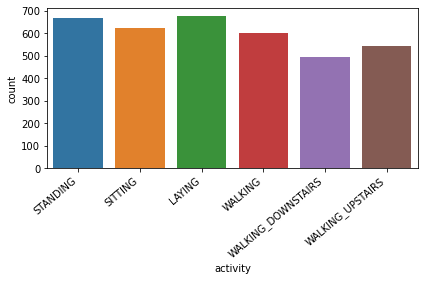

In [9]:
ax=sns.countplot(dataset['activity'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [25]:
dataset.describe()

,tBodyAccJerk.min.Z,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Z.3,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.energy.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,...,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000
mean,0.740366,0.124377,-0.000661,-0.719195,-0.684058,-0.695511,-0.667796,-0.740565,-0.484651,-0.885711,...,0.128643,-0.300816,-0.619368,0.007295,0.009499,0.029732,-0.011160,-0.498065,0.060443,-0.049592
std,0.307699,0.196072,0.220801,0.304653,0.354215,0.342278,0.358293,0.262467,0.301555,0.189530,...,0.240377,0.318134,0.308501,0.332116,0.448918,0.613608,0.490646,0.508243,0.311204,0.263429
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.994000,-0.975000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,0.532500,-0.004595,-0.138000,-0.987000,-0.981000,-0.982500,-0.986000,-0.947000,-0.749000,-1.000000,...,-0.016200,-0.533000,-0.836000,-0.118000,-0.281000,-0.476500,-0.398000,-0.816000,-0.013950,-0.121500
50%,0.940000,0.133000,0.014000,-0.896000,-0.908000,-0.917000,-0.881000,-0.887000,-0.637000,-0.992000,...,0.132000,-0.341000,-0.707000,0.007740,0.009830,0.031200,-0.014400,-0.716000,0.183000,-0.005260
75%,0.987000,0.265500,0.154000,-0.482000,-0.448500,-0.468500,-0.364000,-0.582500,-0.259500,-0.844000,...,0.289500,-0.117000,-0.501000,0.141500,0.308500,0.554500,0.373000,-0.524000,0.252000,0.104000
max,0.999000,0.773000,0.679000,1.000000,0.934000,0.980000,0.941000,1.000000,0.893000,0.853000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [26]:
dataset.columns

Index(['rn', 'activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y',
       'tBodyAcc.mean.Z', 'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z',
       'tBodyAcc.mad.X', 'tBodyAcc.mad.Y',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=563)

Checking some columns values are normalized or not

C:\Users\dpaul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tBodyAcc.mean.X', ylabel='Density'>

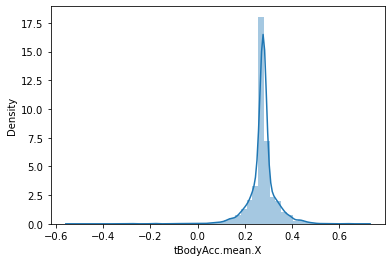

In [27]:
sns.distplot(dataset['tBodyAcc.mean.X'])

C:\Users\dpaul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tBodyAcc.mean.Y', ylabel='Density'>

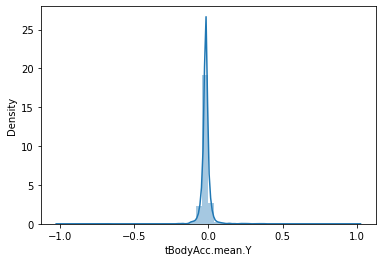

In [28]:
sns.distplot(dataset['tBodyAcc.mean.Y'])

C:\Users\dpaul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tBodyAcc.mean.Z', ylabel='Density'>

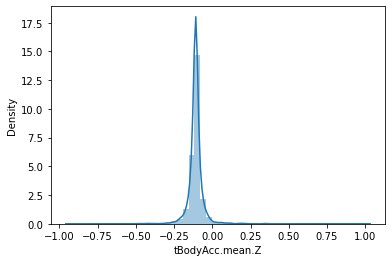

In [31]:
sns.distplot(dataset['tBodyAcc.mean.Z'])

C:\Users\dpaul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='angle.tBodyAccJerkMean.gravityMean', ylabel='Density'>

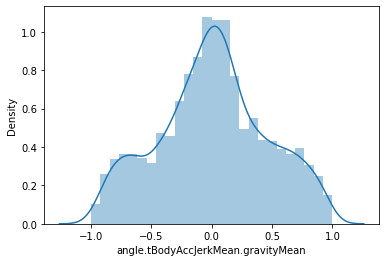

In [30]:
sns.distplot(dataset['angle.tBodyAccJerkMean.gravityMean'])

In [10]:
X=dataset.iloc[:,2:]
X


,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.279,-0.0196,-0.11,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,0.277,-0.0127,-0.103,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.94,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,0.277,-0.0147,-0.107,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,0.276,-0.017,-0.111,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,-0.946,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.357,-0.0446,-0.13,-0.314,-0.0556,-0.173,-0.386,-0.0575,-0.217,0.0262,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3633,0.344,0.00479,-0.122,-0.32,-0.0667,-0.182,-0.38,-0.071,-0.245,-0.117,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3634,0.284,-0.00796,-0.119,-0.309,-0.0804,-0.211,-0.369,-0.0971,-0.301,-0.117,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3635,0.207,0.0246,-0.104,-0.365,-0.169,-0.216,-0.449,-0.186,-0.326,-0.176,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [11]:
Y = dataset.iloc[:,1:2]
Y

,activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
3632,WALKING_UPSTAIRS
3633,WALKING_UPSTAIRS
3634,WALKING_UPSTAIRS
3635,WALKING_UPSTAIRS


Splitting or Deviding the dataset between train and test data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=0)

In [13]:
x_train

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
2577,0.284,-0.0266,-0.12,-0.276,-0.0824,-0.0678,-0.32,-0.073,-0.0725,0.0217,...,-0.0136,-0.338,-0.609,-0.17300,0.5990,0.392,0.1180,-0.897,0.1680,0.00458
3000,0.335,0.00518,-0.135,0.228,-0.196,-0.298,0.156,-0.199,-0.333,0.5,...,0.3040,-0.515,-0.820,-0.40800,0.9450,0.920,0.7040,-0.908,0.0755,-0.04710
735,0.298,-0.0238,-0.0783,0.0764,-0.0283,-0.363,0.0235,-0.0713,-0.366,0.355,...,0.0158,-0.290,-0.629,-0.36300,-0.9710,0.891,-0.7610,-0.772,0.2100,-0.09700
1800,0.212,-0.0602,-0.174,-0.27,0.0295,0.129,-0.302,-0.0715,0.157,-0.23,...,0.2460,-0.787,-0.959,0.00882,0.6930,-0.875,-0.1900,-0.571,0.2260,0.29400
2998,0.313,-0.0358,-0.0619,0.0743,-0.201,-0.42,-0.011,-0.283,-0.413,0.509,...,-0.0815,-0.284,-0.620,-0.23600,-0.1510,-0.642,0.7820,-0.910,0.0412,-0.01630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,0.272,-0.02,-0.113,-0.993,-0.984,-0.985,-0.993,-0.983,-0.984,-0.94,...,0.3380,-0.519,-0.829,0.02320,0.0540,-0.872,0.3910,-0.569,0.2610,0.27300
3298,0.278,0.00528,-0.0867,-0.347,-0.318,-0.353,-0.428,-0.337,-0.318,0.0812,...,-0.1600,-0.359,-0.723,0.13300,-0.7590,0.938,-0.0760,-0.707,0.2930,-0.03780
1687,0.279,-0.0176,-0.109,-0.996,-0.998,-0.996,-0.996,-0.999,-0.996,-0.94,...,0.1480,-0.547,-0.856,-0.14600,-0.0794,-0.101,0.0309,-0.716,-0.0487,-0.12100
2641,0.301,-0.0561,-0.078,0.271,0.289,0.324,0.166,0.283,0.349,0.725,...,0.1920,0.103,-0.186,-0.14000,-0.3830,0.972,-0.1520,-0.491,0.2730,0.32800


In [14]:
x_test

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
2557,0.267,-0.0191,-0.101,-0.996,-0.996,-0.99,-0.997,-0.996,-0.991,-0.947,...,0.5170,-0.5650,-0.845,-0.0866,0.30100,-0.2070,0.1070,0.518,-0.5500,-0.45100
2540,0.276,-0.0141,-0.112,-0.992,-0.951,-0.976,-0.994,-0.956,-0.975,-0.935,...,-0.5840,-0.1070,-0.550,0.1140,0.00404,-0.1650,0.5530,-0.898,0.0658,-0.05070
3337,0.244,-0.0262,-0.0917,-0.912,-0.92,-0.951,-0.919,-0.939,-0.957,-0.839,...,-0.0166,-0.2780,-0.607,-0.0259,0.14700,-0.1510,0.3950,0.395,-0.3130,-0.67300
934,0.281,-0.0169,-0.113,-0.996,-0.99,-0.991,-0.997,-0.991,-0.992,-0.939,...,0.2180,-0.2400,-0.618,-0.1760,-0.00376,-0.0875,-0.0422,-0.477,-0.2290,-0.13600
1593,0.258,-7.24e-05,-0.14,-0.025,0.165,-0.101,-0.0345,-3.47e-05,-0.129,0.207,...,0.2890,0.5090,0.263,0.3190,0.34300,-0.8280,0.5510,-0.760,0.2510,-0.04690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,0.236,-0.0467,-0.0675,-0.024,-0.0639,-0.532,-0.0875,-0.0942,-0.53,0.376,...,-0.0731,-0.0599,-0.495,0.2100,0.98200,-0.3050,-0.4250,-0.880,0.1790,0.03700
385,0.25,-0.0019,-0.113,-0.408,0.013,-0.624,-0.479,0.0205,-0.597,-0.0639,...,-0.0394,-0.0307,-0.388,0.5090,-0.38000,0.5000,0.0139,-0.831,0.2140,0.00252
2143,0.268,-0.0193,-0.103,-0.297,-0.0768,-0.265,-0.33,-0.121,-0.259,-0.193,...,0.1970,-0.3330,-0.631,0.4690,0.38400,-0.9310,-0.2740,-0.766,0.2270,0.11900
932,0.279,-0.0178,-0.114,-0.995,-0.994,-0.985,-0.995,-0.993,-0.986,-0.935,...,0.2910,-0.4490,-0.793,0.1290,-0.40600,0.0233,-0.2260,-0.478,-0.2270,-0.13800


In [15]:
y_train

,activity
2577,WALKING
3000,WALKING_DOWNSTAIRS
735,WALKING_DOWNSTAIRS
1800,WALKING_UPSTAIRS
2998,WALKING
...,...
869,STANDING
3298,WALKING_UPSTAIRS
1687,SITTING
2641,WALKING_DOWNSTAIRS


In [16]:
y_test

,activity
2557,LAYING
2540,STANDING
3337,LAYING
934,SITTING
1593,WALKING
...,...
3110,WALKING
385,WALKING
2143,WALKING_UPSTAIRS
932,SITTING


In [17]:
classifier = KNeighborsClassifier(n_neighbors=40)  
classifier.fit(x_train, y_train) 

C:\Users\dpaul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=40)

In [18]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred)*100)

91.53952843273233


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
confusion_matrix(y_test,y_pred)

array([[140,   0,   0,   0,   0,   0],
       [  0,  95,  19,   0,   0,   0],
       [  0,  17, 132,   0,   0,   1],
       [  0,   0,   0, 109,   2,   0],
       [  0,   0,   0,   9,  78,   4],
       [  0,   0,   0,   7,   2, 106]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       140
           SITTING       0.85      0.83      0.84       114
          STANDING       0.87      0.88      0.88       150
           WALKING       0.87      0.98      0.92       111
WALKING_DOWNSTAIRS       0.95      0.86      0.90        91
  WALKING_UPSTAIRS       0.95      0.92      0.94       115

          accuracy                           0.92       721
         macro avg       0.92      0.91      0.91       721
      weighted avg       0.92      0.92      0.92       721

